# Comprensión de los Datos

In [48]:
#importa librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Descripción de Variables

Pregnancies - Número de embarazos: Cuantitativa discreta

Glucose - Nivel de glucosa en plasma a 2 horas: Cuantitativa continua

BloodPressure - Presión arterial (mm Hg): Cuantitativa continua

SkinThickness - Grosor del pliegue cutáneo (mm): Cuantitativa continua

Insulin - Insulina sérica a 2 horas (mu U/ml): Cuantitativa continua

BMI - Índice de masa corporal (kg/m²): Cuantitativa continua

DiabetesPedigreeFunction - Función de predisposición genética a diabetes: Cuantitativa continua

Age - Edad (años): Cuantitativa discreta

Outcome - Diagnóstico de diabetes (0 = No, 1 = Sí): Categórica Nominal

In [3]:
#lee archivo csv
diabetes = pd.read_csv("diabetes.csv")

In [44]:
# Número de filas y columnas
print("Dimensiones:", diabetes.shape)

# Información de columnas y tipos de datos
diabetes.info()

# Número de valores únicos
diabetes.nunique()

Dimensiones: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
#Revisa los últimos 5 renglones del dataset usando la función tail()
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Exploración de Datos

In [10]:
#utiliza la función describe() para obtener estadística básica. se puede incluir -0
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
for col in diabetes.columns:
    print(f"{col}:")
    print(f"  Mínimo: {diabetes[col].min()}")
    print(f"  Máximo: {diabetes[col].max()}")
    print(f"  Media: {diabetes[col].mean():.5f}")
    print(f"  Mediana: {diabetes[col].median():.2f}")
    print(f"  Desviación estándar: {diabetes[col].std():.2f}")
    print("-"*30)


Pregnancies:
  Mínimo: 0
  Máximo: 17
  Media: 3.84505
  Mediana: 3.00
  Desviación estándar: 3.37
------------------------------
Glucose:
  Mínimo: 0
  Máximo: 199
  Media: 120.89453
  Mediana: 117.00
  Desviación estándar: 31.97
------------------------------
BloodPressure:
  Mínimo: 0
  Máximo: 122
  Media: 69.10547
  Mediana: 72.00
  Desviación estándar: 19.36
------------------------------
SkinThickness:
  Mínimo: 0
  Máximo: 99
  Media: 20.53646
  Mediana: 23.00
  Desviación estándar: 15.95
------------------------------
Insulin:
  Mínimo: 0
  Máximo: 846
  Media: 79.79948
  Mediana: 30.50
  Desviación estándar: 115.24
------------------------------
BMI:
  Mínimo: 0.0
  Máximo: 67.1
  Media: 31.99258
  Mediana: 32.00
  Desviación estándar: 7.88
------------------------------
DiabetesPedigreeFunction:
  Mínimo: 0.078
  Máximo: 2.42
  Media: 0.47188
  Mediana: 0.37
  Desviación estándar: 0.33
------------------------------
Age:
  Mínimo: 21
  Máximo: 81
  Media: 33.24089
  Mediana:

In [66]:
# Conteo y porcentaje de cada clase en Outcome
conteo = diabetes['Outcome'].value_counts()
porcentaje = diabetes['Outcome'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Distribución de Outcome (diagnóstico de diabetes tipo 2):\n")
for valor in conteo.index:
    print(f"{valor} -> {conteo[valor]} casos ({porcentaje[valor]:.2f}%)")


Distribución de Outcome (diagnóstico de diabetes tipo 2):

0 -> 500 casos (65.10%)
1 -> 268 casos (34.90%)


## Conclusiones generales
El conjunto de datos contiene información de 768 pacientes con diversas variables clínicas y demográficas que pueden influir en el desarrollo de Diabetes. Se observan varios puntos importantes:
1. **Composición general de los datos**: Se identifican nueve variables: número de embarazos (Pregnancies), nivel de glucosa (Glucose), presión arterial diastólica (BloodPressure), grosor del pliegue cutáneo (SkinThickness), nivel de insulina (Insulin), índice de masa corporal (BMI), historial genético de diabetes (DiabetesPedigreeFunction), edad (Age) y resultado del diagnóstico (Outcome). La base contiene únicamente valores numéricos (enteros o flotantes), y un total de 768 registros sin valores nulos explícitos, aunque varias variables contienen ceros que representan valores faltantes.
   
2. **Presencia de valores atípicos y posibles datos faltantes**: Variables como Glucose, BloodPressure, SkinThickness, Insulin y BMI presentan valores de 0, lo cual no es fisiológicamente posible y probablemente corresponde a datos faltantes que deben ser tratados antes de cualquier análisis avanzado. Insulin destaca por su alta dispersión y un valor máximo extremadamente alto (846), lo que sugiere la existencia de outliers que podrían influir de forma importante en los resultados.

3. **Distribución de las variables clínicas**: Los niveles medios de Glucose (120.9 mg/dl) y BMI (31.99) indican que la mayoría de las personas de la muestra presentan sobrepeso y niveles de glucosa moderadamente altos, ambos factores de riesgo para el desarrollo de Diabetes.  La presión arterial media (69.1 mmHg) y la edad promedio (33 años) reflejan que se trata de una población principalmente joven y con presión en rangos normales, aunque con algunos casos de valores elevados. El DiabetesPedigreeFunction tiene valores bajos en la mayoría de los casos, lo que indica que la predisposición genética es leve para la mayoría de los pacientes, aunque existen algunos casos con predisposición alta.

4. **Distribución del diagnóstico de diabetes**: Aproximadamente un 34% de las personas en el conjunto de datos tienen un diagnóstico positivo (Outcome = 1), lo que representa una proporción significativa de casos de diabetes en la muestra

5. **Relación entre media, mediana y dispersión**: En la mayoría de las variables la media y la mediana son cercanas, lo que indica distribuciones relativamente simétricas. Sin embargo, en Insulin y SkinThickness la gran diferencia entre media y mediana, así como su alta desviación estándar, sugiere distribuciones sesgadas y la existencia de valores muy alejados del promedio.

## Variables Cuantitativas

### Medidas de tendencia central


In [67]:
# Lista de variables cuantitativas
variables_cuantitativas = ['Pregnancies', 'Glucose', 'BloodPressure', 
                           'SkinThickness', 'Insulin', 'BMI', 
                           'DiabetesPedigreeFunction', 'Age']

# Recorrer cada variable y calcular media, mediana y moda
for var in variables_cuantitativas:
    mean_val = diabetes[var].mean()
    median_val = diabetes[var].median()
    mode_val = diabetes[var].mode()[0]  # Tomamos la primera moda si hay varias
    print(f"{var}:")
    print(f"  Media: {mean_val:.2f}")
    print(f"  Mediana: {median_val:.2f}")
    print(f"  Moda: {mode_val}")
    print("-"*30)


Pregnancies:
  Media: 3.85
  Mediana: 3.00
  Moda: 1
------------------------------
Glucose:
  Media: 120.89
  Mediana: 117.00
  Moda: 99
------------------------------
BloodPressure:
  Media: 69.11
  Mediana: 72.00
  Moda: 70
------------------------------
SkinThickness:
  Media: 20.54
  Mediana: 23.00
  Moda: 0
------------------------------
Insulin:
  Media: 79.80
  Mediana: 30.50
  Moda: 0
------------------------------
BMI:
  Media: 31.99
  Mediana: 32.00
  Moda: 32.0
------------------------------
DiabetesPedigreeFunction:
  Media: 0.47
  Mediana: 0.37
  Moda: 0.254
------------------------------
Age:
  Media: 33.24
  Mediana: 29.00
  Moda: 22
------------------------------


# Variables Categóricas

In [68]:
#Para conteo  de cada valor en una columna, en orden descendente usar función value_counts():    
# nombreDataframe.columna.value_counts()
# nombreDataframe['columna'].value_counts()
print("Conteo de pacientes según diagnóstico de diabetes:")
print(diabetes['Outcome'].value_counts())

Conteo de pacientes según diagnóstico de diabetes:
Outcome
0    500
1    268
Name: count, dtype: int64


## Consulta

In [70]:
# df.iloc[i]: Accede a la fila en la posición i.
# Acceder a la primera fila
print("Primera fila del dataset:")
diabetes.iloc[0]

Primera fila del dataset:


Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

In [71]:
# Acceder a las dos primeras filas
diabetes.iloc[:2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [90]:
#Selección de filas [indicar dataframe[columna] operador valor]
print("\nPacientes con diagnóstico de diabetes:")
pacientes=diabetes[diabetes['Outcome']==1]
pacientes.head(10)


Pacientes con diagnóstico de diabetes:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
15,7,100,0,0,0,30.0,0.484,32,1


In [75]:
# Filtrar pacientes con glucosa alta (Glucose > 140)
glucosa_alta = diabetes[diabetes['Glucose'] > 140]
print("\nPacientes con glucosa > 140 mg/dl:")
glucosa_alta.head(10)


Pacientes con glucosa > 140 mg/dl:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
8,2,197,70,45,543,30.5,0.158,53,1
11,10,168,74,0,0,38.0,0.537,34,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
22,7,196,90,0,0,39.8,0.451,41,1
24,11,143,94,33,146,36.6,0.254,51,1
26,7,147,76,0,0,39.4,0.257,43,1
28,13,145,82,19,110,22.2,0.245,57,0


In [89]:
# Ordenar los pacientes con diabetes por nivel de insulina de mayor a menor
pacientes = pacientes.sort_values(by='Insulin', ascending=False)
print("\nPacientes con diabetes ordenados por Insulina (mayor a menor):")
pacientes.head(10)


Pacientes con diabetes ordenados por Insulina (mayor a menor):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
584,8,124,76,24,600,28.7,0.687,52,1
409,1,172,68,49,579,42.4,0.702,28,1
8,2,197,70,45,543,30.5,0.158,53,1
655,2,155,52,27,540,38.7,0.240,25,1
753,0,181,88,44,510,43.3,0.222,26,1
186,8,181,68,36,495,30.1,0.615,60,1
111,8,155,62,26,495,34.0,0.543,46,1
695,7,142,90,24,480,30.4,0.128,43,1
220,0,177,60,29,478,34.6,1.072,21,1


In [91]:
# Filtrar pacientes con BMI en rango de obesidad (BMI >= 30) y Glucose alta (> 140)
obesidad_glucosa_alta = diabetes[(diabetes['BMI'] >= 30) & (diabetes['Glucose'] > 140)]
print("\nPacientes obesos con glucosa alta:")
obesidad_glucosa_alta.head(15)


Pacientes obesos con glucosa alta:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
8,2,197,70,45,543,30.5,0.158,53,1
11,10,168,74,0,0,38.0,0.537,34,1
13,1,189,60,23,846,30.1,0.398,59,1
22,7,196,90,0,0,39.8,0.451,41,1
24,11,143,94,33,146,36.6,0.254,51,1
26,7,147,76,0,0,39.4,0.257,43,1
31,3,158,76,36,245,31.6,0.851,28,1
40,3,180,64,25,70,34.0,0.271,26,0
43,9,171,110,24,240,45.4,0.721,54,1


# Conclusiones
Al explorar las filas y realizar filtrados específicos en el conjunto de datos de diabetes, se obtienen varias observaciones relevantes. La primera fila del dataset corresponde a un paciente de 50 años con antecedentes de 6 embarazos, glucosa de 148 mg/dl, BMI de 33.6 y diagnóstico positivo de diabetes, lo que nos permite contextualizar los registros. Al filtrar todos los pacientes con diagnóstico positivo (Outcome = 1), se observa que estos presentan una amplia variabilidad en sus mediciones clínicas, incluyendo niveles de glucosa que van desde moderados hasta extremadamente altos. Cuando se consideran únicamente los pacientes con glucosa superior a 140 mg/dl, se identifica un grupo significativo de individuos con riesgo elevado, incluyendo algunos con valores de insulina muy altos o BMI en rango de obesidad. Y al filtrar simultáneamente pacientes con obesidad (BMI ≥ 30) y glucosa alta (> 140 mg/dl), se identifica un subgrupo de pacientes con riesgo elevado combinado de diabetes, sobrepeso y glucosa alta, lo que resalta la importancia de realizar análisis bivariados y multivariados para comprender mejor los factores de riesgo y la distribución de las variables clínicas en la población estudiada.

## Análisis bivariado

In [119]:
# Correlación entre Glucose e Insulin
corr_glu_ins = diabetes[['Glucose', 'Insulin']].corr().iloc[0,1]
print(f"\nCorrelación entre Glucose e Insulin: {corr_glu_ins:.2f}")
    
# Media de Insulina por rangos de Glucosa
diabetes.groupby(pd.cut(diabetes['Glucose'], bins=5), observed=True)['Insulin'].mean()


Correlación entre Glucose e Insulin: 0.33


Glucose
(-0.199, 39.8]      4.600000
(39.8, 79.6]       22.000000
(79.6, 119.4]      51.275204
(119.4, 159.2]    104.817829
(159.2, 199.0]    143.235294
Name: Insulin, dtype: float64

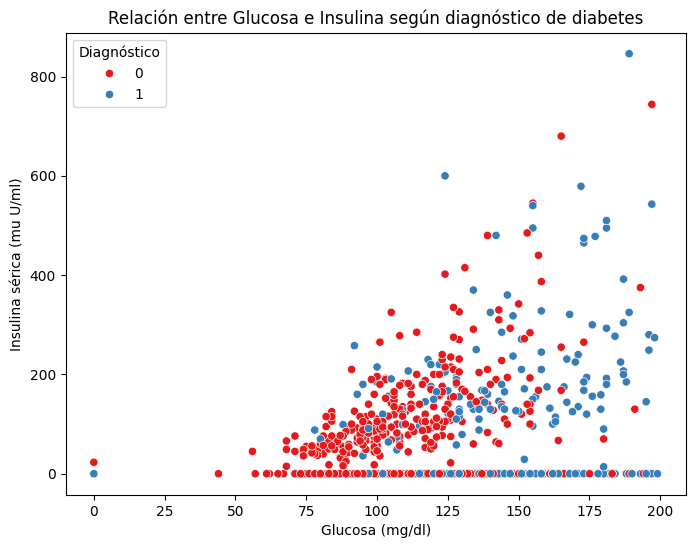

In [120]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=diabetes, 
    x='Glucose', 
    y='Insulin', 
    hue='Outcome', 
    palette='Set1'
)
plt.title('Relación entre Glucosa e Insulina según diagnóstico de diabetes')
plt.xlabel('Glucosa (mg/dl)')
plt.ylabel('Insulina sérica (mu U/ml)')
plt.legend(title='Diagnóstico')
plt.show()


Correlación entre Pregnancies y Glucose: 0.13
Media de Glucose por número de embarazos:
Pregnancies
0     123.000000
1     112.748148
2     110.796117
3     123.586667
4     125.117647
5     118.859649
6     120.800000
7     136.444444
8     131.736842
9     131.392857
10    120.916667
11    126.454545
12    113.555556
13    125.500000
14    137.500000
15    136.000000
17    163.000000
Name: Glucose, dtype: float64


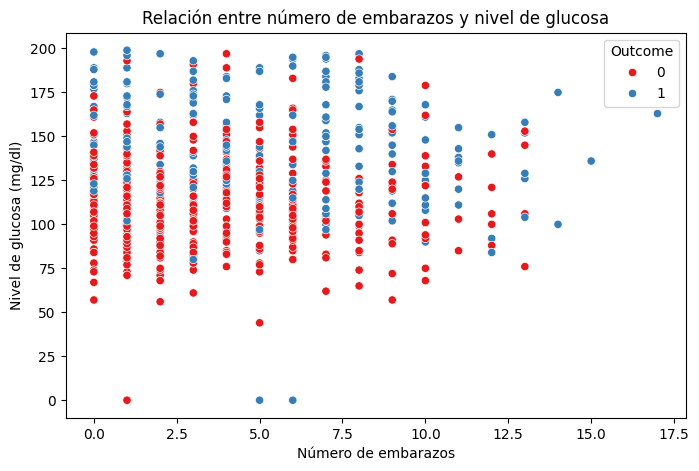

In [116]:
corr = diabetes['Pregnancies'].corr(diabetes['Glucose'])
print(f"\nCorrelación entre Pregnancies y Glucose: {corr:.2f}")

# Media de Glucose por número de embarazos
media_glucose_por_preg = diabetes.groupby('Pregnancies')['Glucose'].mean()
print("Media de Glucose por número de embarazos:")
print(media_glucose_por_preg)

plt.figure(figsize=(8,5))
sns.scatterplot(data=diabetes, x='Pregnancies', y='Glucose', hue='Outcome', palette='Set1')
plt.title('Relación entre número de embarazos y nivel de glucosa')
plt.xlabel('Número de embarazos')
plt.ylabel('Nivel de glucosa (mg/dl)')
plt.show()

In [113]:
# Correlación entre BMI y Age
corr_bmi_age = diabetes[['BMI', 'Age']].corr().iloc[0,1]
print(f"\nCorrelación entre BMI y Age: {corr_bmi_age:.2f}")
# Media de BMI por rangos de Edad
diabetes.groupby(pd.cut(diabetes['Age'], bins=5), observed=True)['BMI'].mean()


Correlación entre BMI y Age: 0.04


Age
(20.94, 33.0]    31.528481
(33.0, 45.0]     33.878977
(45.0, 57.0]     32.165789
(57.0, 69.0]     29.243590
(69.0, 81.0]     26.000000
Name: BMI, dtype: float64

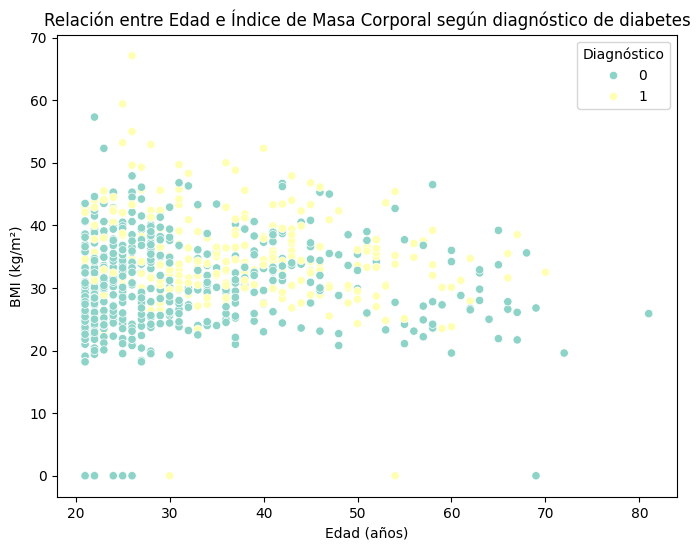

In [121]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=diabetes, 
    x='Age', 
    y='BMI', 
    hue='Outcome', 
    palette='Set3'
)
plt.title('Relación entre Edad e Índice de Masa Corporal según diagnóstico de diabetes')
plt.xlabel('Edad (años)')
plt.ylabel('BMI (kg/m²)')
plt.legend(title='Diagnóstico')
plt.show()

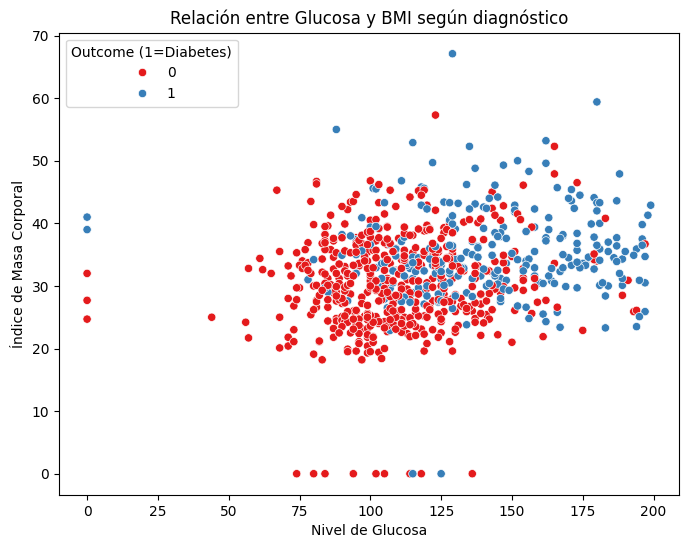

In [122]:
# Gráfico de dispersión entre Glucosa y BMI
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=diabetes, 
    x='Glucose', 
    y='BMI', 
    hue='Outcome', 
    palette='Set1'
)
plt.title('Relación entre Glucosa y BMI según diagnóstico')
plt.xlabel('Nivel de Glucosa')
plt.ylabel('Índice de Masa Corporal')
plt.legend(title='Outcome (1=Diabetes)')
plt.show()


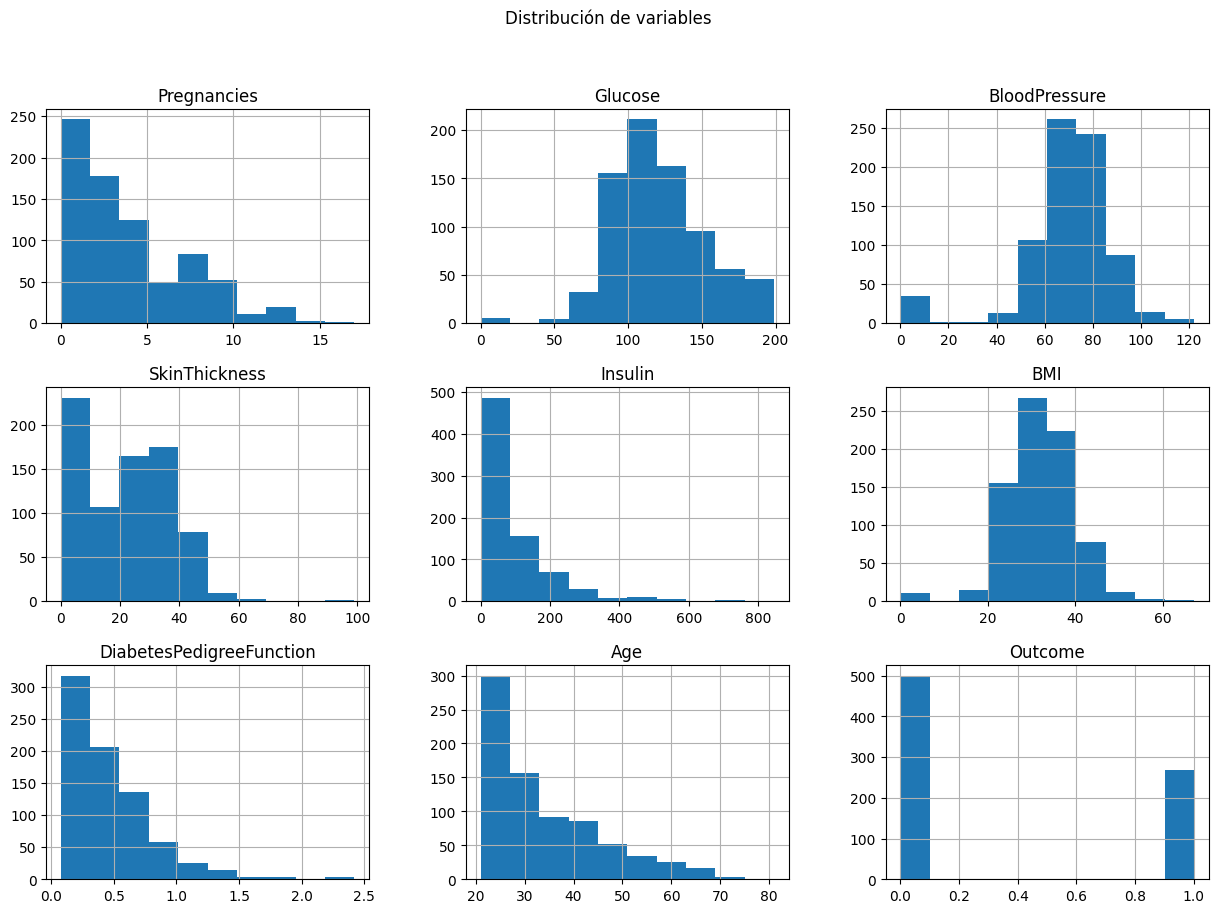

In [46]:
# distribución de variables
diabetes.hist(figsize=(15,10))
plt.suptitle("Distribución de variables")
plt.show()


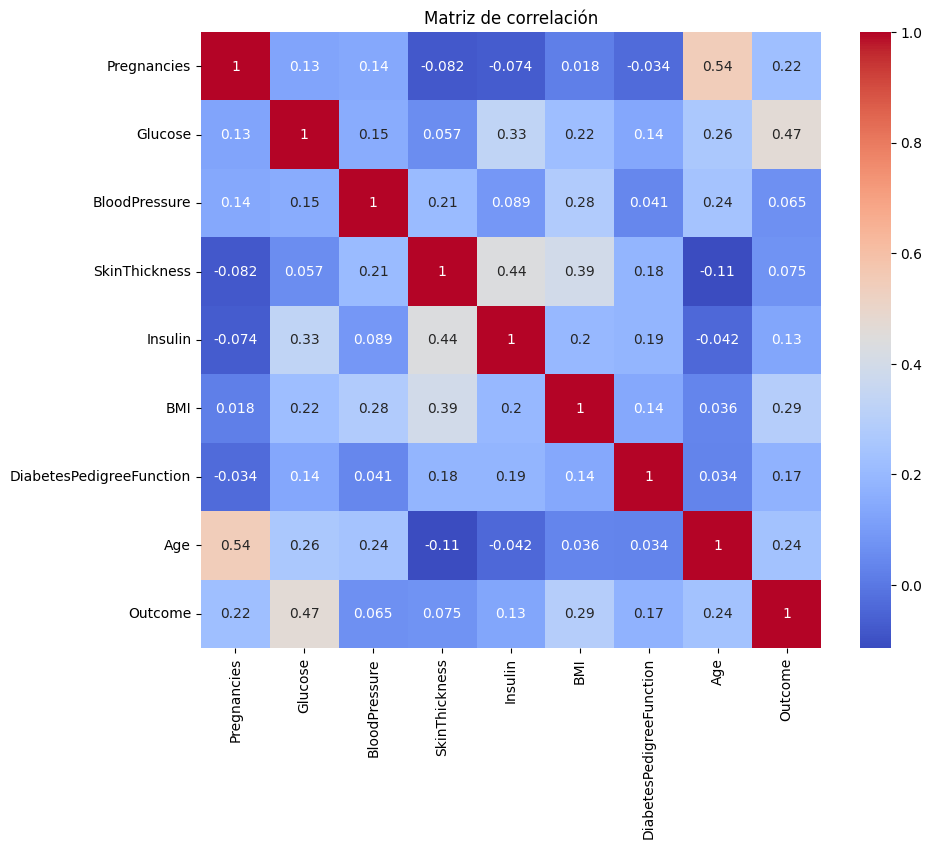

In [53]:
# Matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(diabetes.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()
